# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Cahya Navila
- **Email:** navilavila04@gmail.com
- **ID Dicoding:** cahya_navila_NXce

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak dan sedikit di order?
- Bagaimana demografi dari customers?
- Payment type apa yang paling banyak dan sedikit digunakan customers?
- Status order apa yang paling banyak dan sedikit?
- Score review apa yang paling banyak dan sedikit diberikan customers?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

## Data Wrangling

### Gathering Data

**Data customers**

In [2]:
file_id = "1P3DSMvW4HICcY61x99vO7ZHlXPeFOu1p"
url = f"https://drive.google.com/uc?id={file_id}"

customers_df = pd.read_csv(url)

customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Data geolocation**

In [3]:
file_id = "1Nshrmlx-XQibvNwRgMnFACmLMU5bxZ75"
url = f"https://drive.google.com/uc?id={file_id}"

geolocation_df = pd.read_csv(url)

geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Data order_items**

In [4]:
file_id = "1K158oL6M1-SyhRFCHZJPkke6W1fYKKx6"
url = f"https://drive.google.com/uc?id={file_id}"

order_items_df = pd.read_csv(url)

order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Data order_payments**

In [5]:
file_id = "10hvdV6VgYHRzzhTxadkLmQ7r8fLUYlNj"
url = f"https://drive.google.com/uc?id={file_id}"

order_payments_df = pd.read_csv(url)

order_payments_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Data order_reviews**

In [6]:
file_id = "1k-0sutR-ecHhBYzY8xAkp7_VCdoURSYG"
url = f"https://drive.google.com/uc?id={file_id}"

order_reviews_df = pd.read_csv(url)

order_reviews_df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Data orders**

In [7]:
file_id = "1seOv9qjLKrwsjBX-SDmpww2ABCTCAUa5"
url = f"https://drive.google.com/uc?id={file_id}"

orders_df = pd.read_csv(url)

orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Data product_category_name**

In [8]:
file_id = "1AC3RLlhhssfPfMn_Lqjja-TrBFKiXCj3"
url = f"https://drive.google.com/uc?id={file_id}"

product_category_df = pd.read_csv(url)

product_category_df.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Data product**

In [9]:
file_id = "14SvIIo0SnPeTWnuO6ayfwXlU0zdsA5JJ"
url = f"https://drive.google.com/uc?id={file_id}"

product_df = pd.read_csv(url)

product_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Data sellers**

In [10]:
file_id = "1UyhbzsAcuYrP20pafJjhWIzpp5rUEyLd"
url = f"https://drive.google.com/uc?id={file_id}"

sellers_df = pd.read_csv(url)

sellers_df.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**

Terdapat 9 dataset
- customers
  - customer_id
  - customer_unique_id
  - customer_zip_code_prefix
  - customer_city
  - customer_state
- geolocation
  - geolocation_zip_code_prefix
  - geolocation_lat
  - geolocation_lng
  - geolocation_city
  - geolocation_state
- order_items
  - order_id
  - order_item_id
  - product_id
  - seller_id
  - shipping_limit_date
  - price
  - freight_value
- order_payments
  - order_id
  - payment_sequential
  - payment_type
  - payment_installments
  - payment_value
- order_review
  - review_id
  - order_id
  - review_score
  - review_comment_title
  - review_comment_message
  - review_creation_date
  - review_answer_timestamp
- orders
  - order_id
  - customer_id
  - order_status
  - order_puchase_timestamp
  - order_approved_at
  - order_delivered_carrier_date
  - order_delivered_customer_date
  - order_estimated_delivery_date
- product_category
  - product_category_name
  - product_category_name_english
- products
  - product_id
  - product_category_name
  - product_name_lenght
  - product_description_lenght
  - product_photos_qty
  - product_weight_g
  - product_length_cm
  - product_height_cm
  - product_width_cm
- sellers
  - seller_id
  - seller_zip_code_prefix
  - seller_city
  - seller_state

### Assessing Data

**customers**

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak terdapat masalah pada jumlah data
- Tidak terdapat masalah dengan tipe data
- Tidak terdapat data yang duplikat
- Tidak terdapat masalah pada pemeriksaan dengan parameter statistik

**geolocation**

In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [16]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Tidak terdapat masalah pada jumlah data
- Tidak terdapat masalah dengan tipe data
- Terdapat 261831 data yang duplikat
- Tidak terdapat masalah pada pemeriksaan dengan parameter statistik



**order_items**

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak terdapat masalah pada jumlah data
- Terdapat kesalahan tipe data pada kolom shipping_limit_date seharusnya direpresentasikan sebagai tipe data datetime
- Tidak terdapat data yang duplikat
- Tidak terdapat masalah pada pemeriksaan dengan parameter statistik


**order_payments**

In [21]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight**:
- Tidak terdapat masalah pada jumlah data
- Tidak terdapat masalah dengan tipe data
- Tidak terdapat data yang duplikat
- Tidak terdapat masalah pada pemeriksaan dengan parameter statistik



**order_revews**

In [24]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [27]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Terdapat missing values pada kolom review_comment_title sebanyak 87656 dan kolom review_comment_message sebanyak 58247.
- Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp seharusnya direpresentasikan sebagai tipe data datetime
- Tidak terdapat data yang duplikat
- Tidak terdapat masalah pada pemeriksaan dengan parameter statistik



**orders**

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [29]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Terdapat missing value pada kolom order_approved_at sebanyak 160, order_delivered_carrier_date sebanyak 1783, dan order_delivered_customer_date sebanyak 2965
- Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date seharusnya direpresentasikan sebagai tipe data datetime
- Tidak terdapat data yang duplikat



**product_category_name**

In [31]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [32]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak terdapat masalah pada jumlah data
- Tidak terdapat masalah dengan tipe data
- Tidak terdapat data yang duplikat



**products**

In [33]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Insight:
- Terdapat missing value pada kolom product_category_name sebanyak 610, product_name_lenght sebanyak 610, product_description_lenght sebanyak 610, product_photos_qty sebanyak 610, product_weight_g sebanyak 2, product_length_cm sebanyak 2, product_height_cm sebanyak 2, dan product_width_cm sebanyak 2
- Tidak terdapat masalah dengan tipe data
- Tidak terdapat data yang duplikat
- Tidak terdapat masalah pada pemeriksaan dengan parameter statistik


**sellers**

In [37]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [38]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [39]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Tidak terdapat masalah pada jumlah data
- Tidak terdapat masalah dengan tipe data
- Tidak terdapat data yang duplikat
- Tidak terdapat masalah pada pemeriksaan dengan parameter statistik



### Cleaning Data

**geolocation**

In [40]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Sudah tidak terdapat duplikasi pada data

**order_items**

In [41]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Tipe data pada kolom shipping_limit_date sudah dibenarkan menjadi datetime

**order_reviews**

In [42]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [43]:
missing_reviews = order_reviews_df[
    order_reviews_df['review_comment_title'].isna() | order_reviews_df['review_comment_message'].isna()
]


result = missing_reviews[['review_comment_title', 'review_comment_message']]
print(result)


      review_comment_title                             review_comment_message
0                      NaN                                                NaN
1                      NaN                                                NaN
2                      NaN                                                NaN
3                      NaN              Recebi bem antes do prazo estipulado.
4                      NaN  Parabéns lojas lannister adorei comprar pela I...
...                    ...                                                ...
99219                  NaN                                                NaN
99220                  NaN                                                NaN
99221                  NaN  Excelente mochila, entrega super rápida. Super...
99222                  NaN                                                NaN
99223                  NaN  meu produto chegou e ja tenho que devolver, po...

[89385 rows x 2 columns]


In [44]:
new_order_reviews_df = order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'])

new_order_reviews_df.head()





,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53


In [45]:
new_order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


**Insight:**
- Tipe data pada kolom review_creation_date dan review_answer_timestamp sudah dibenarkan menjadi datetime
- Pada kolom review_comment_title dan review_comment_massage yang awalnya terdapat missing value akhirnya dihapus. Alasan penghapusan ini karena cukup sulit untuk mengisi nilai tersebut karena type datanya objek. Namun review tetap dapat diketahui melalui kolom review_score.
- Terdapat data frame baru bernama new_order_reviews_df yang terdiri dari kolom yang sama dengan data frame order_review_df tanpa dua kolom yang sudah dihapus.

**orders**

In [46]:
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [47]:
missing_date = orders_df[
    orders_df['order_approved_at'].isna() | orders_df['order_delivered_carrier_date'].isna() | orders_df['order_delivered_customer_date'].isna()
]

# Menampilkan kolom yang diinginkan
result = missing_date[['order_status','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date']]
result

,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
6,invoiced,2017-04-13 13:25:17,NaT,NaT
44,shipped,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT
103,invoiced,2018-08-07 06:15:14,NaT,NaT
128,processing,2017-09-03 14:30:09,NaT,NaT
154,shipped,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT
...,...,...,...,...
99283,canceled,NaT,NaT,NaT
99313,processing,2018-01-09 07:18:05,NaT,NaT
99347,canceled,NaT,NaT,NaT
99348,unavailable,2017-08-28 15:44:47,NaT,NaT


In [48]:
def median_date(series):

    dates = pd.to_datetime(series.dropna())
    return dates.median()


orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(median_date(orders_df['order_approved_at']))
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(median_date(orders_df['order_delivered_carrier_date']))
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(median_date(orders_df['order_delivered_customer_date']))


orders_df.isna().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- Tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date sudah dibenarkan menjadi datetime
- Missing valuenya sudah di atasi. Alasan missing value diisi daripada dihapus karena pada tahap analisis ingin mengetahui jumlah dari tiap kategori order_status.

**products**

In [49]:
duplicates = product_df['product_id'].duplicated(keep=False)  # keep=False untuk menandai semua duplikat

num_duplicates = duplicates.sum()
print(f"Jumlah duplikat di kolom 'product_id': {num_duplicates}")

Jumlah duplikat di kolom 'product_id': 0


In [50]:
product_df['product_category_name'] = product_df['product_category_name'].fillna("tidak diketahui")
numerical_columns = product_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in numerical_columns:
    if col != 'product_id':
        median_value = product_df[col].median()
        mean_value = product_df[col].mean()

        if abs(mean_value - median_value) < 1e-5:
            product_df[col] = product_df[col].fillna(mean_value)
        else:
            product_df[col] = product_df[col].fillna(median_value)

In [51]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Missing Value pada kolom product_category_name diisi dengan tidak diketahui. Karena tidak ada informasi lain yang bisa digunakan untuk memperkirakan isi dari missing value di kolom tersebut.
- Untuk kolom lain yang memiliki type data numerik missing value diisi dengan mean atau median.

## Exploratory Data Analysis (EDA)

### Explore Data customers

In [52]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [53]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [54]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- Customer paling banyak berasal dari kota sao paulo dengan jumlah 15540 customer, urutan kedua rio de janeiro dengan jumlah 6882 customer, dan urutan ketiga belo horizonte dengan jumlah 2773 customer.
- Customer paling banyak berasal dari negara SP dengan jumlah 41746 customer, urutan kedua RJ dengan jumlah 12852 customer, dan MG dengan jumlah 11635 customer. 

### Explore Data order_items

In [55]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


**Insight:**
- Jumlah order sebanyak 112650
- Produk berada pada rentang harga 0.850000 sampai 6735.000000
- Biaya pengiriman produk berada pada rentang 0.000000 sampai 409.680000


### Explore Data order_payments

In [56]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [57]:
order_payments_df.groupby(by="payment_type").order_id.count().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

**Insight:**
- Terdapat 5 payment_type yaitu credit_card, baleto,voucher, debit_card, dan non_defined
- Payment_type yang paling banyak digunakan oleh customer adalah credit_card dengan jumlah 76795 pengguna.
- Angsuran customer mulai dari 0 hingga 24
- Total pembayaran yang dilakukan pelanggan mulai dari 0 hingga 13664.080000

### Explore Data order_reviews

In [58]:
new_order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,NaN,NaN
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,NaN,NaN
freq,3,3,NaN,NaN,NaN
mean,NaN,NaN,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


In [59]:
new_order_reviews_df.groupby(by="review_score").review_id.count().sort_values(ascending=False)

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_id, dtype: int64

**Insight:**
- Review_score yang paling banyak diberikan adalah 5 dengan jumlah 57328 review.
- Rata-rata review_score yang diberikan adalah 4

### Explore Data orders

In [60]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:18:44.955833088,2018-01-05 06:20:07.051638784,2018-01-15 01:58:11.206298112,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [61]:
orders_df.groupby(by="order_status").order_id.count().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

**Insight:**
- Terdapat 8 order_status yaitu delivered,shipped,canceled,unavailable,invoiced,processing,created,dan approved.
- Delivered merupakan order_status yang paling banyak dengan jumlah 96478.

### Explore Data sallers

In [62]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [63]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

In [64]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AM       1
AC       1
PI       1
MA       1
PA       1
Name: seller_id, dtype: int64

**Insight:**
- Seller paling banyak di kota sao paulo dengan jumlah 694 seller, hal ini berbading lurus dengan jumlah customer di kota sao paulo yang juga banyak.
- Seller paling banyak di negara SP dengan jumlah 1849 seller, hal ini juga berbanding lurus dengan jumlah customer di negara SP yang juga banyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
#### Kategori produk apa yang paling banyak dan sedikit di order?

In [65]:
merged_data = pd.merge(order_items_df, product_df, on='product_id')

product_sales = merged_data.groupby('product_id').agg({'order_item_id': 'count'}).reset_index()
product_sales.rename(columns={'order_item_id': 'sales_quantity'}, inplace=True)

sorted_products = product_sales.sort_values(by='sales_quantity')

selected_products_with_names = pd.merge(sorted_products, product_df, on='product_id')
sum_order = selected_products_with_names.groupby(by="product_category_name").sales_quantity.sum()
sum_order=sum_order.to_frame()
sum_order.sort_values(by="sales_quantity", ascending=False)

,sales_quantity
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


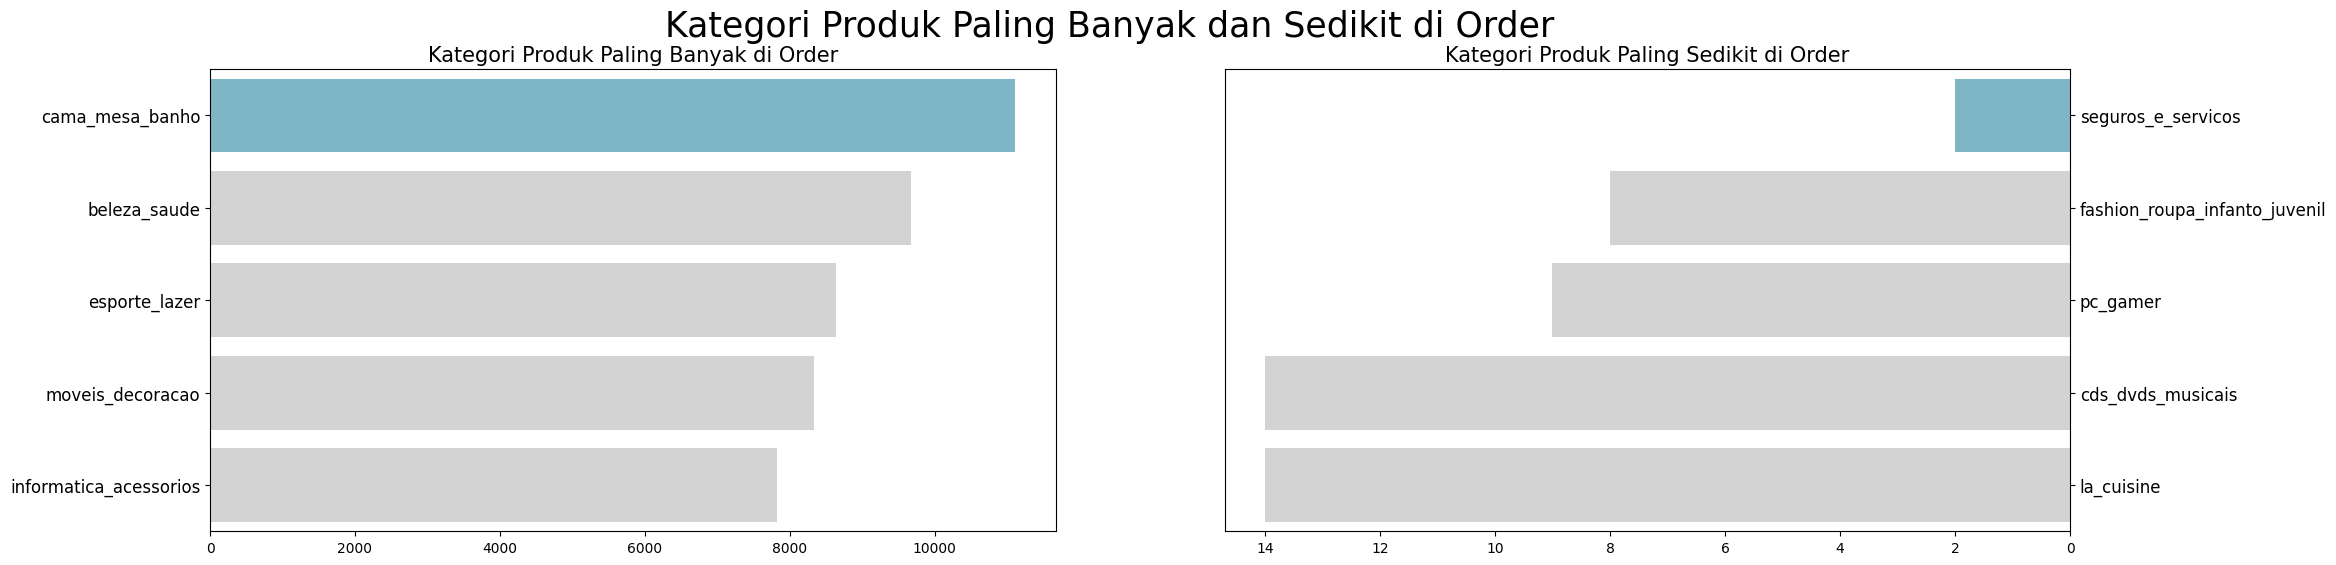

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sn.barplot(x="sales_quantity", y="product_category_name",hue="product_category_name", data=sum_order.sort_values(by="sales_quantity", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori Produk Paling Banyak di Order", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sn.barplot(x="sales_quantity", y="product_category_name",hue="product_category_name", data=sum_order.sort_values(by="sales_quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori Produk Paling Sedikit di Order", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Kategori Produk Paling Banyak dan Sedikit di Order", fontsize=25)
plt.show()

**Insight:**
- Cama_mesa_banho adalah kategori produk yang paling banyak di order dengan jumlah 11115 order.
- Seguros_e_servicos adalah kategori produk yang paling sedikit di order dengan jumlah 2 order.

### Pertanyaan 2:
#### Bagaimana demografi dari customers?

**Berdasarkan Negara**

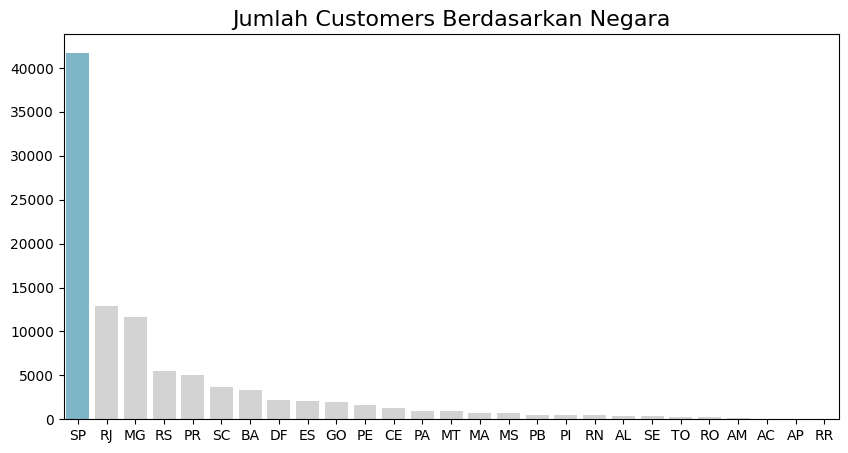

In [68]:
bystate_df = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

plt.figure(figsize=(10, 5))

colors = ["#72BCD4"] + ["#D3D3D3"] * (len(bystate_df) - 1)

sn.barplot(
    x="customer_state",
    y="customer_count",
    hue="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)

plt.title("Jumlah Customers Berdasarkan Negara", loc="center", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()


**Berdasarkan Kota**

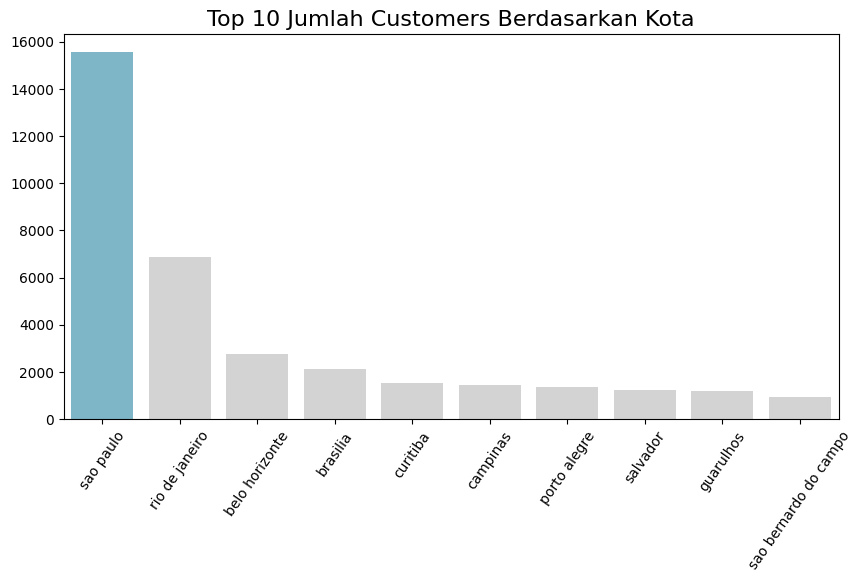

In [69]:
bystate_df = customers_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

top_10_bystate_df = bystate_df.sort_values(by="customer_count", ascending=False).head(10)

plt.figure(figsize=(10, 5))

colors = ["#72BCD4"] + ["#D3D3D3"] * (len(top_10_bystate_df) - 1)

sn.barplot(
    x="customer_city",
    y="customer_count",
    hue="customer_city",
    data=top_10_bystate_df,
    palette=colors
)

plt.title("Top 10 Jumlah Customers Berdasarkan Kota", loc="center", fontsize=16)

plt.xticks(rotation=55)
plt.xlabel("")
plt.ylabel("")

plt.show()


**Insight:**
- Customers paling banyak berasal dari negara SP dengan jumlah 41746 customer.
- Customer paling banyak berasal dari kota Sao Paulo dengan jumlah 15540 customer.

### Pertanyaan 3:
#### Payment type apa yang paling banyak dan sedikit digunakan customers?

In [70]:
pay_type = order_payments_df.groupby(by="payment_type").order_id.count().sort_values(ascending=False).reset_index()
pay_type


,payment_type,order_id
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


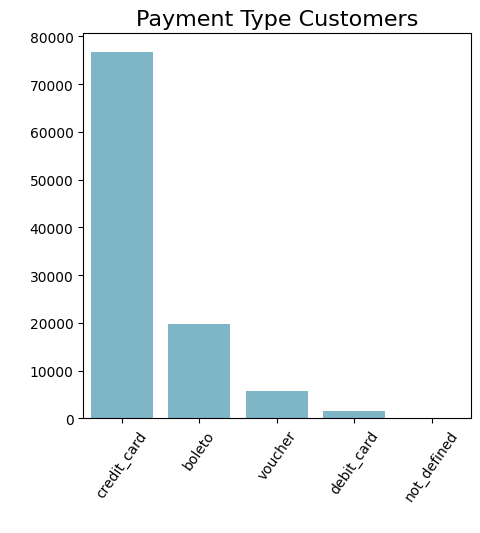

In [71]:
plt.figure(figsize=(5, 5))

sn.barplot(
    x="payment_type",
    y="order_id",
    data=pay_type,
    color="#72BCD4"
)


plt.title("Payment Type Customers", loc="center", fontsize=16)

plt.xticks(rotation=55)
plt.xlabel(" ")
plt.ylabel(" ")

plt.show()


**Insight:**
- Credit card adalah payment type yang paling banyak digunakan customer dengan jumlah 76795 customer.
- Debit card adalah payment type yang paling sedikit digunakan customer dengan jumlah 1529 customer. 
- Terdapat 3 payment type customer yang tidak diketahui.

### Pertanyaan 4:
#### Status order apa yang paling banyak dan sedikit?

In [72]:
order_stat = orders_df.groupby(by="order_status").order_id.count().sort_values(ascending=False).reset_index()
order_stat

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


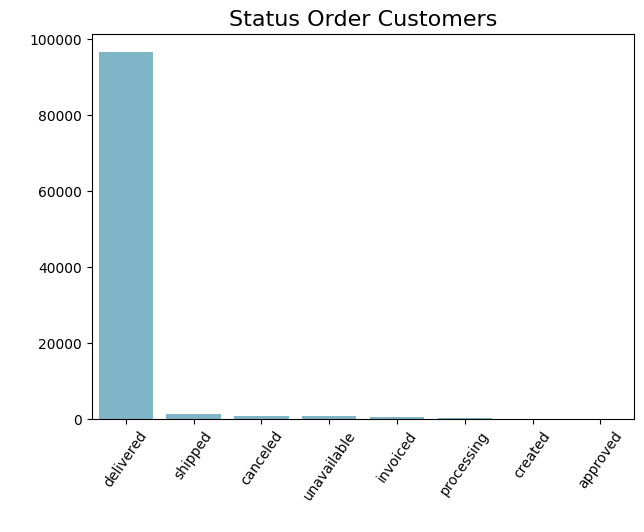

In [73]:
plt.figure(figsize=(7, 5))

sn.barplot(
    x="order_status",
    y="order_id",
    data=order_stat,
    color="#72BCD4"
)

plt.title("Status Order Customers", loc="center", fontsize=16)

plt.xticks(rotation=55)
plt.xlabel(" ")
plt.ylabel(" ")

plt.show()


**Insight:**
- Delivered adalah status order yang paling banyak dengan jumlah 96478.
- Approved adalah status order yang paling sedikit dengan jumlah 2.

### Pertanyaan 5:
#### Score review apa yang paling banyak dan sedikit diberikan customer?

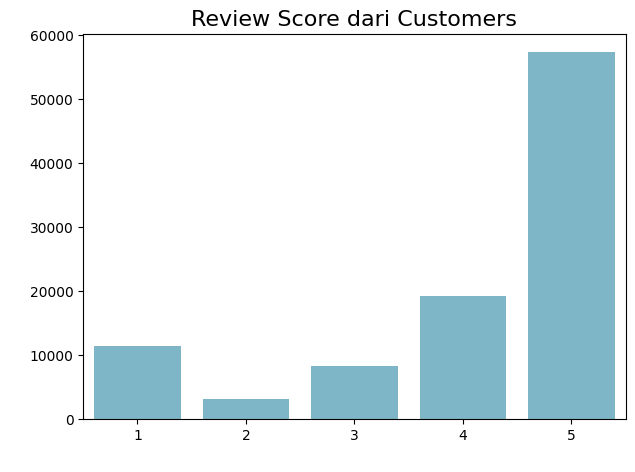

In [75]:
review = order_reviews_df.groupby(by="review_score").review_id.count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(7, 5))

sn.barplot(
    x="review_score",
    y="review_id",
    data=review,
    color="#72BCD4"
)

plt.title("Review Score dari Customers", loc="center", fontsize=16)

plt.xlabel(" ")
plt.ylabel(" ")

plt.show()


**Insight:**
- Review score 5 adalah yang paling banyak diberikan customer dengan jumlah 57328 review.
- Review score 2 adalah yang paling sedikit diberikan customer dengan jumlah 3151 review.

### Pertanyaan 6:
#### Bagaimana demografi seller?

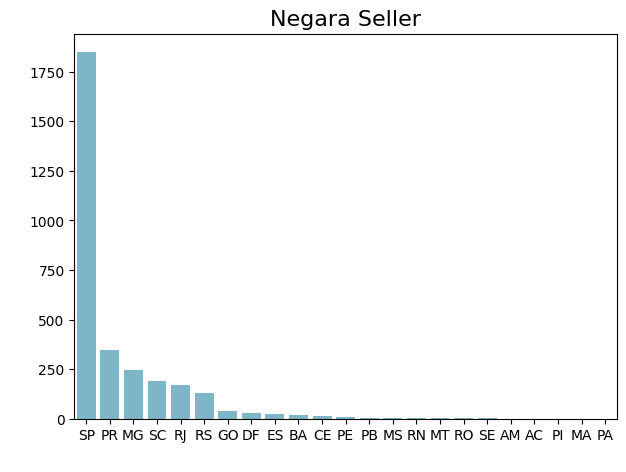

In [78]:
review = sellers_df.groupby(by="seller_state").seller_id.count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(7, 5))

sn.barplot(
    x="seller_state",
    y="seller_id",
    data=review,
    color="#72BCD4"
)

plt.title("Negara Seller", loc="center", fontsize=16)

plt.xlabel(" ")
plt.ylabel(" ")

plt.show()

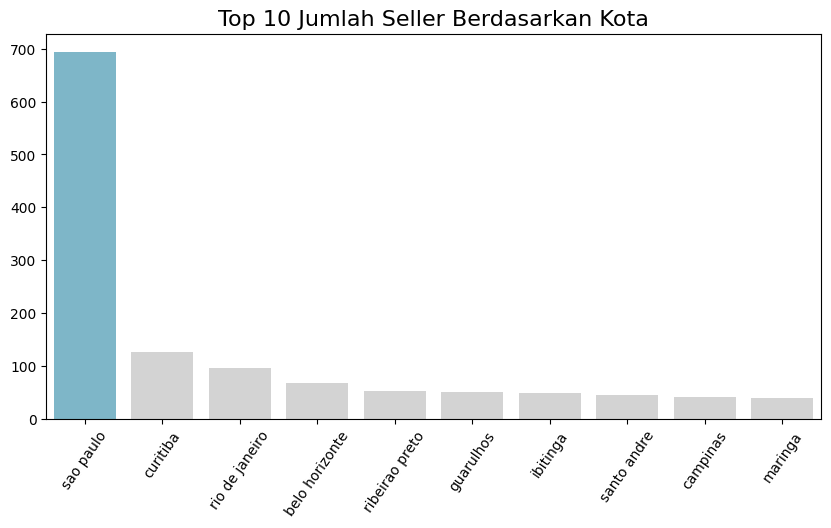

In [80]:
bystate_df = sellers_df.groupby(by="seller_city").seller_id.nunique().reset_index()
bystate_df.rename(columns={"seller_id": "seller_count"}, inplace=True)

top_10_bystate_df = bystate_df.sort_values(by="seller_count", ascending=False).head(10)

plt.figure(figsize=(10, 5))

colors = ["#72BCD4"] + ["#D3D3D3"] * (len(top_10_bystate_df) - 1)

sn.barplot(
    x="seller_city",
    y="seller_count",
    hue="seller_city",
    data=top_10_bystate_df,
    palette=colors
)

plt.title("Top 10 Jumlah Seller Berdasarkan Kota", loc="center", fontsize=16)

plt.xticks(rotation=55)
plt.xlabel("")
plt.ylabel("")

plt.show()


**Insight:**
- Seller paling banyak berasal dari negara SP dengan jumlah 1849 seller.
- Seller paling banyak berasal dari kota dengan jumlah 694 seller.

## Analisis Lanjutan (Opsional)

## Conclusion

- Cama_mesa_banho adalah kategori produk yang paling banyak di order dengan jumlah 11115 order dan
Seguros_e_servicos adalah kategori produk yang paling sedikit di order dengan jumlah 2 order. Berdasarkan hal ini kategori produk cama_meso_banho dapat dipertahankan bahkan ditingkatkan baik dari segi kualitas ataupun startegi penjualannya agar dapat meningkat lagi penjualannya. Untuk kategori produk seguros_e_servicos dapat dievaluasi, diperbaiki, dan ditingkatkan baik dari segi kualitas ataupun strategi penjualan agar kepedannya jauh lebih meningkat penjualannya.  
- Customers paling banyak berasal dari negara SP dengan jumlah 41746 customer dan
customer paling banyak berasal dari kota Sao Paulo dengan jumlah 15540 customer. 
- Seller paling banyak berasal dari negara SP dengan jumlah 1849 seller dan seller paling banyak berasal dari kota sao paulo dengan jumlah 694 seller.
- Berdasarkan jumlah customer dan seller dapat diketahui bahwa jumlah seller berbanding lurus dengan customer. Contohnya di negara SP memiliki banyak selller bengitu juga customernya juga banyak. Hal ini dapat digunakan masukan bisnis apabila ingin menambah customer disuatu negara atau kota maka bisa menambah seller di negara atau kota tersebut. 
- Credit card adalah payment type yang paling banyak digunakan customer dengan jumlah 76795 pengguna dan
Debit card adalah payment type yang paling sedikit digunakan customer dengan jumlah 1529 pengguna. Hal ini dapat digunakan dalam strategi bisnis untuk meningktkan jumlah order/ pembelian dengan memberi promo pada pengguna credit card.
- Delivered adalah status order yang paling banyak dengan jumlah 96478 order dan
Approved adalah status order yang paling sedikit dengan jumlah 2. Selain itu terdapat order yang di cancel sebanyak 625 dengan ini dapat ditingkatkan lagi agar kedepannnya julah cancel semakin sedikit. 
- Review score 5 adalah yang paling banyak diberikan customer dengan jumlah 57328 review dan
Review score 2 adalah yang paling sedikit diberikan customer dengan jumlah 3151 review. Selain itu review score 1 juga banyak sejumlah 11424 hal ini dapat ditelusuri lebih lanjut agar kedepannya yang memberikan bintang 1 dan 2 semakin sedikit.